# NPGO and Wind Demonstration

In this notebook, we will generate plots of the time series of the overall physical environment in the salish sea, including NPGO index and wind speed along the strait, demonstrating why we chose 2011 and 2018 as critical years to analyze. 

## NPGO Index Plot

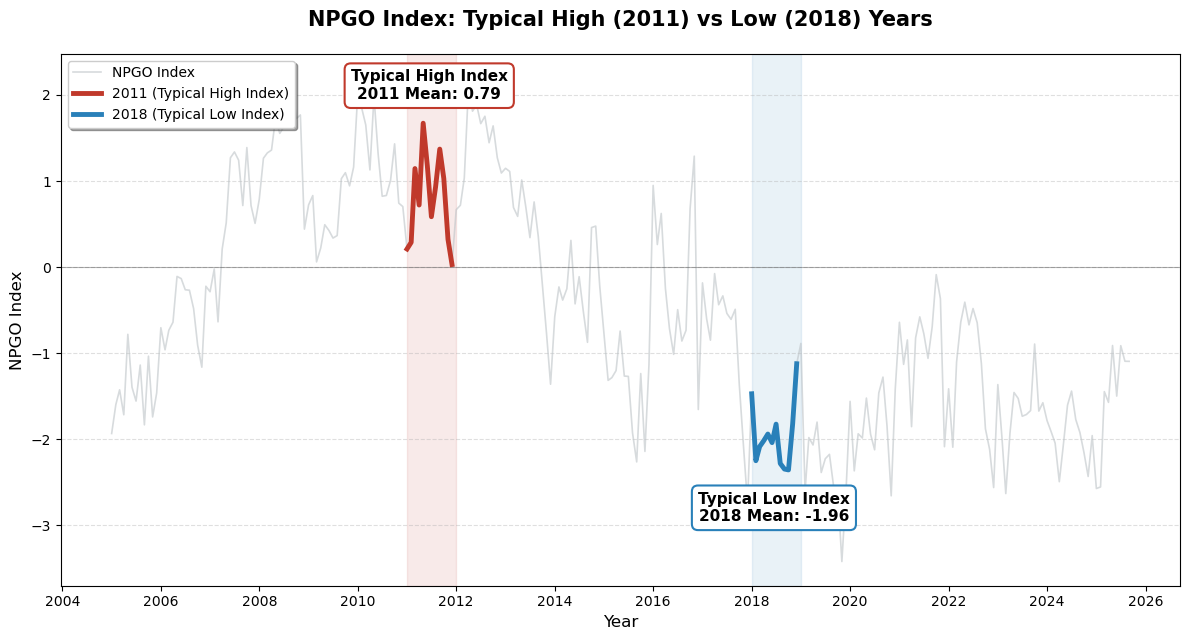

In [1]:
# NPGO Index Time Series

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. 加载数据
file_path = '/home/jqiu/Programing/Projects/analysis-junqi/Diaton_vs_Flagellate_Report/Data_NPGO/npgo.csv'
df = pd.read_csv(file_path, skiprows=1, names=['Date', 'NPGO'], skipinitialspace=True)

# 2. 数据清洗
df['Date'] = pd.to_datetime(df['Date'])
df['NPGO'] = pd.to_numeric(df['NPGO'], errors='coerce')
df.loc[df['NPGO'] == -9999, 'NPGO'] = None
df = df.dropna()

# 3. 调整范围：只保留 2005 年以后的数据
df_filtered = df[df['Date'] >= '2005-01-01'].copy()


# 4. 开始绘图
plt.figure(figsize=(12, 6.5))
plt.plot(df_filtered['Date'], df_filtered['NPGO'], color='#bdc3c7', linewidth=1.2, label='NPGO Index', alpha=0.6)
plt.axhline(0, color='black', linestyle='-', linewidth=0.8, alpha=0.3)

# 5. 定义要标注的特殊年份及其属性
special_years = {
    2011: {"label": "Typical High Index", "color": "#c0392b"}, # 深红
    2018: {"label": "Typical Low Index", "color": "#2980b9"}   # 深蓝
}

for year, info in special_years.items():
    year_data = df_filtered[df_filtered['Date'].dt.year == year]
    
    if not year_data.empty:
        # 计算该年平均值
        annual_mean = year_data['NPGO'].mean()
        
        # 突出显示该年曲线
        plt.plot(year_data['Date'], year_data['NPGO'], color=info['color'], linewidth=3.5, label=f"{year} ({info['label']})")
        
        # 阴影填充
        plt.axvspan(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'), color=info['color'], alpha=0.1)
        
        # 标注平均值
        # 确定标注的垂直位置：如果是高值年标在上方，低值年标在下方
        va = 'bottom' if annual_mean > 0 else 'top'
        xy_text = (0, 70) if annual_mean > 0 else (0, -40)
        
        # 找到该年中点日期用于放置标注
        mid_date = pd.Timestamp(f'{year}-06-15')
        
        plt.annotate(f"{info['label']}\n{year} Mean: {annual_mean:.2f}",
                     xy=(mid_date, annual_mean),
                     xytext=xy_text,
                     textcoords='offset points',
                     ha='center', va=va,
                     # arrowprops=dict(arrowstyle='->', color=info['color'], connectionstyle="arc3,rad=0.1"),
                     fontsize=11, fontweight='bold',
                     bbox=dict(boxstyle="round,pad=0.4", fc="white", ec=info['color'], lw=1.5))

# 6. 图表装饰
plt.title('NPGO Index: Typical High (2011) vs Low (2018) Years', fontsize=15, fontweight='bold', pad=20)
plt.ylabel('NPGO Index', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)

# 优化时间轴
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend(loc='upper left', frameon=True, shadow=True)
plt.tight_layout()

# 保存并显示
plt.savefig('npgo_time_series.svg', format='svg', bbox_inches='tight')
plt.show()

The North Pacific Gyre Oscillation (NPGO) represents the second-dominant mode of sea surface height and temperature variability across the Northeast Pacific, serving as a critical indicator of regional ocean circulation dynamics. Unlike the Pacific Decadal Oscillation (PDO), which primarily reflects thermal fluctuations, the NPGO is more intrinsically coupled with the strength of the North Pacific Gyre and the California Current System. In the context of the Salish Sea and its adjacent coastal waters, the NPGO acts as a primary driver of nutrient flux and vertical mixing. Positive phases of the NPGO, such as the typical high-index year observed in 2011, are associated with enhanced wind-driven upwelling and increased advection of cold, saline, and nutrient-rich subarctic waters into the region. These conditions typically stimulate primary productivity and favor the dominance of large-cell phytoplankton, such as diatoms. Conversely, negative NPGO phases, exemplified by the low-index year in 2018, often correlate with reduced nutrient availability and increased stratification. Such shifts in the physico-chemical environment can lead to significant taxonomic transitions in the microbial community, potentially favoring flagellates over diatoms. Consequently, the NPGO serves as a superior predictor for chlorophyll-a concentrations and zooplankton biomass compared to broader atmospheric indices, making it an essential parameter for understanding the bottom-up forcing of the Salish Sea’s trophic structure.

## Wind Speed along the Strait

Before we start, it is necessary that we should define the regions that we will focus on. Here, we will generate plots that indicate the region and sections that we may use later in the analysis, which could be input in the Methods part in the report.

For simplicity, I will consider using 3 sections and 3 locations, all defined by 3 coordinates, which will be transferred in grid points in the Grids, and then be expanded to regions or sections in the Grids.

Loading grid from /results2/SalishSea/nowcast-green.201905/01jun18/SalishSea_1d_20180601_20180601_grid_T.nc...
Processing Point#1: (49.0, -123.25)
  -> Nearest Index: y=403, x=287
  -> Actual Coord: 48.9980, -123.2494
  -> Cut Defined: x[252:309] (Width: 57)
Processing Point#2: (49.3, -124.0)
  -> Nearest Index: y=515, x=215
  -> Actual Coord: 49.3015, -123.9982
  -> Cut Defined: x[185:285] (Width: 100)
Processing Point#3: (49.9, -124.8)
  -> Nearest Index: y=689, x=172
  -> Actual Coord: 49.9009, -124.8009
  -> Cut Defined: x[127:197] (Width: 70)
Plotting map...
Adding observation stations...
Map saved to: /home/jqiu/Programing/Projects/analysis-junqi/Diatom_vs_Flagellate_Report/Results_svg/Grid_Targets_Visualization.svg


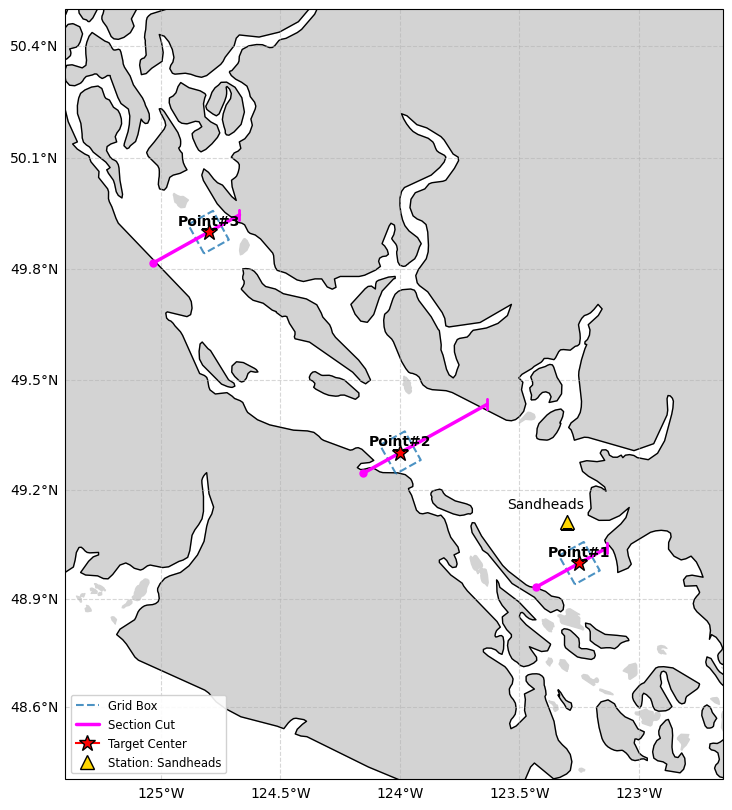

In [16]:
# Grid_Slicer_Visualization
# TARGETS_DEFINITIONS = {
#     'Point_1': {'value': (49.0, -123.25), 'label': 'Point#1'},
#     'Point_2': {'value': (49.3, -124.0), 'label': 'Point#2'},
#     'Point_3': {'value': (49.9, -124.8), 'label': 'Point#3'},
# }


# 目标：
# 1. 找到指定经纬度最近的网格点 (i, j)。
# 2. 划定一个网格范围（Box），在地图上显示为平行四边形。
# 3. 划定一条断面线（Section），预留修改起点终点的余地。
# 4. 绘图展示。

import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

# ================= USER CONFIGURATION (可修改区域) =================

# 1. 定义目标点
TARGETS_DEFINITIONS = {
    'Point_1': {'value': (49.0, -123.25), 'label': 'Point#1'},
    'Point_2': {'value': (49.3, -124.0),  'label': 'Point#2'},
    'Point_3': {'value': (49.9, -124.8),  'label': 'Point#3'},
}

STATIONS_DEFINITIONS = {
    
    'SH': {'lat': 49.11, 'lon': -123.3, 'label': 'Sandheads',  'color': 'gold'}
}

# 2. 定义“挖一块”的大小
# 半径：例如 5 代表以中心点为原点，向上下左右各扩 5 个格点 (也就是 11x11 的方块)
GRID_BOX_RADIUS = 10 

# 3. 定义“切一刀”的配置 (这里是你调整断面宽度的地方) 🔪
# 默认模式：Fixed_Y (东西向切，保持 Y 索引不变，改变 X 索引)
# left_offset: 从中心点向左（索引减小）延伸多少格
# right_offset: 从中心点向右（索引增大）延伸多少格
SECTION_CONFIG = {
    'Point_1': {'left_offset': 35, 'right_offset': 22},
    'Point_2': {'left_offset': 30, 'right_offset': 70}, # 比如这里我想切得不对称一点
    'Point_3': {'left_offset': 45, 'right_offset': 25},
}

# 4. 文件路径配置
# 使用一个典型的网格文件来获取 lat/lon 信息即可，不需要加载具体盐度数据
BASE_DIR = '/results2/SalishSea/nowcast-green.201905/'
# 随便找一天存在的数据来读取网格
SAMPLE_FILE_PATH = os.path.join(BASE_DIR, '01jun18/SalishSea_1d_20180601_20180601_grid_T.nc')

OUTPUT_DIR = '/home/jqiu/Programing/Projects/analysis-junqi/Diatom_vs_Flagellate_Report/Results_svg/'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# 变量名
VAR_LAT = 'nav_lat'
VAR_LON = 'nav_lon'

# ================= END CONFIGURATION =================

def load_grid(file_path):
    """加载经纬度网格"""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Grid file not found: {file_path}")
    
    with nc.Dataset(file_path, 'r') as ds:
        lat_2d = ds.variables[VAR_LAT][:]
        lon_2d = ds.variables[VAR_LON][:]
    return lat_2d, lon_2d

def find_nearest_index(lat_2d, lon_2d, target_lat, target_lon):
    """找到最近的 grid 索引 (y, x)"""
    dist_sq = (lat_2d - target_lat)**2 + (lon_2d - target_lon)**2
    min_idx_flat = dist_sq.argmin()
    y_idx, x_idx = np.unravel_index(min_idx_flat, lat_2d.shape)
    return y_idx, x_idx

def get_parallelogram_coords(lat_2d, lon_2d, cy, cx, radius):
    """
    获取围绕中心点 (cy, cx) 的网格方块的四个角点坐标。
    这确保了如果网格是歪的，画出来的就是平行四边形。
    """
    ny, nx = lat_2d.shape
    
    # 边界检查
    y_min = max(0, cy - radius)
    y_max = min(ny - 1, cy + radius)
    x_min = max(0, cx - radius)
    x_max = min(nx - 1, cx + radius)
    
    # 提取四个角的经纬度 (顺序：左下 -> 左上 -> 右上 -> 右下 -> 左下)
    # Corner 1: (y_min, x_min)
    # Corner 2: (y_max, x_min)
    # Corner 3: (y_max, x_max)
    # Corner 4: (y_min, x_max)
    
    lats = [lat_2d[y_min, x_min], lat_2d[y_max, x_min], lat_2d[y_max, x_max], lat_2d[y_min, x_max], lat_2d[y_min, x_min]]
    lons = [lon_2d[y_min, x_min], lon_2d[y_max, x_min], lon_2d[y_max, x_max], lon_2d[y_min, x_max], lon_2d[y_min, x_min]]
    
    return lons, lats

def get_section_line_coords(lat_2d, lon_2d, cy, cx, config):
    """
    获取“切一刀”的断面线坐标。
    基于 Fixed Y (沿 X 轴切)。
    """
    ny, nx = lat_2d.shape
    l_off = config['left_offset']
    r_off = config['right_offset']
    
    # 计算起点和终点的 X 索引
    x_start = max(0, cx - l_off)
    x_end = min(nx - 1, cx + r_off)
    
    # 提取这条线上的所有点，以画出精确的网格轨迹
    # Fixed Y index = cy
    line_lons = lon_2d[cy, x_start:x_end+1]
    line_lats = lat_2d[cy, x_start:x_end+1]
    
    return line_lons, line_lats, (cy, x_start), (cy, x_end)

def plot_overview(lat_2d, lon_2d, results):
    """绘制总览图"""
    print("Plotting map...")
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=-124))
    
    # 设置显示范围 (自动根据点的范围调整，加一点 padding)
    all_lons = [pt['value'][1] for pt in TARGETS_DEFINITIONS.values()]
    all_lats = [pt['value'][0] for pt in TARGETS_DEFINITIONS.values()]
    
    margin = 0.6
    ax.set_extent([min(all_lons)-margin, max(all_lons)+margin, 
                   min(all_lats)-margin, max(all_lats)+margin], crs=ccrs.PlateCarree())

    # 地图特征
    ax.add_feature(cfeature.LAND, color='lightgray', zorder=1)
    ax.add_feature(cfeature.COASTLINE, linewidth=1, zorder=2)
    gl = ax.gridlines(draw_labels=True, linestyle='--', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Blue, Orange, Green

    for i, (key, res) in enumerate(results.items()):
        color = colors[0]
        label = res['label']
        
        # 1. 绘制平行四边形框 (Grid Box)
        box_lons, box_lats = res['box_coords']
        ax.plot(box_lons, box_lats, transform=ccrs.PlateCarree(), 
                color=color, linestyle='--', linewidth=1.5, alpha=0.8,
                label=f"Grid Box"if i==0 else "")
        
        # 2. 绘制断面线 (Section Cut)
        sec_lons, sec_lats = res['section_coords']
        ax.plot(sec_lons, sec_lats, transform=ccrs.PlateCarree(),
                color='magenta', linewidth=2.5, solid_capstyle='round',
                zorder=5, label=f"Section Cut" if i==0 else "") # 避免图例太乱
        
        # 3. 标记切刀的起点和终点 (便于调试宽度)
        ax.plot(sec_lons[0], sec_lats[0], transform=ccrs.PlateCarree(),
                marker='o', color='magenta', markersize=5, zorder=6)
        ax.plot(sec_lons[-1], sec_lats[-1], transform=ccrs.PlateCarree(),
                marker='|', color='magenta', markersize=8, markeredgewidth=2, zorder=6)

        # 4. 绘制中心目标点
        cy_lat, cx_lon = res['center_coords']
        ax.plot(cx_lon, cy_lat, transform=ccrs.PlateCarree(),
                marker='*', color='red', markersize=12, zorder=10, 
                markeredgecolor='black', label='Target Center' if i==0 else "")
        
        # 添加文字标注 (索引信息)
        idx_str = f"({res['y_idx']}, {res['x_idx']})"
        ax.text(cx_lon, cy_lat + 0.02, f"{label}", transform=ccrs.PlateCarree(),
                horizontalalignment='center', fontweight='bold', zorder=10)
        
        # --- 4. 绘制观测站点 (新增部分) ---
    print("Adding observation stations...")
    for s_id, s_info in STATIONS_DEFINITIONS.items():
        s_lon = s_info['lon']
        s_lat = s_info['lat']
        s_label = s_info['label']
        s_color = s_info.get('color', 'black') # 默认黑色

        # 绘制三角形标记
        ax.plot(s_lon, s_lat, transform=ccrs.PlateCarree(),
                marker='^',          # 使用三角形区分站点
                color=s_color, 
                markersize=10, 
                markeredgecolor='black',
                zorder=15,           # 确保在最上层
                linestyle='None',
                label=f"Station: {s_label}")
        
        # 添加站点文字标签 
        ax.text(s_lon-0.25, s_lat+0.05, s_label, transform=ccrs.PlateCarree(),
                fontsize=10, color='black', verticalalignment='center',
                
                zorder=15)

    ax.legend(loc='lower left', fontsize='small', framealpha=0.9)
    # ax.set_title("Target Points, Regions and Sections", fontsize=14)
    
    out_file = os.path.join(OUTPUT_DIR, "Grid_Targets_Visualization.svg")
    plt.savefig(out_file, dpi=300, bbox_inches='tight')
    print(f"Map saved to: {out_file}")

def main():
    # 1. Load Data
    print(f"Loading grid from {SAMPLE_FILE_PATH}...")
    lat_2d, lon_2d = load_grid(SAMPLE_FILE_PATH)
    
    results = {}
    
    # 2. Process Each Point
    for key, info in TARGETS_DEFINITIONS.items():
        t_lat, t_lon = info['value']
        label = info['label']
        
        print(f"Processing {label}: ({t_lat}, {t_lon})")
        
        # A. Find Center Index
        y_idx, x_idx = find_nearest_index(lat_2d, lon_2d, t_lat, t_lon)
        print(f"  -> Nearest Index: y={y_idx}, x={x_idx}")
        print(f"  -> Actual Coord: {lat_2d[y_idx, x_idx]:.4f}, {lon_2d[y_idx, x_idx]:.4f}")
        
        # B. Define the 'Box' (Parallelogram)
        box_lons, box_lats = get_parallelogram_coords(lat_2d, lon_2d, y_idx, x_idx, GRID_BOX_RADIUS)
        
        # C. Define the 'Section' (Cut)
        sec_config = SECTION_CONFIG.get(key, {'left_offset': 20, 'right_offset': 20}) # Default fallback
        sec_lons, sec_lats, start_idx, end_idx = get_section_line_coords(lat_2d, lon_2d, y_idx, x_idx, sec_config)
        
        print(f"  -> Cut Defined: x[{start_idx[1]}:{end_idx[1]}] (Width: {end_idx[1]-start_idx[1]})")

        results[key] = {
            'label': label,
            'y_idx': y_idx,
            'x_idx': x_idx,
            'center_coords': (lat_2d[y_idx, x_idx], lon_2d[y_idx, x_idx]),
            'box_coords': (box_lons, box_lats),
            'section_coords': (sec_lons, sec_lats)
        }
        
    # 3. Plot
    plot_overview(lat_2d, lon_2d, results)

if __name__ == "__main__":
    main()

Now that we have defined the 3 regions in Salish Sea, basically representing the 3 parts of the SoG, we may begin our wind analysis. It is reasonable to choose Point#1 and surrounding area to calculate the wind along SoG, which is NW45, to avoid the impact of the land and islands. However, processing the hourly forcing data can be distressful. I will consider using the observational data from Sanhead station to plot. 

Sandhead data were downloaded from https://climate.weather.gc.ca/climate_data

已加载: en_climate_daily_BC_1107010_2010_P1D.csv (251 条有效记录)
已加载: en_climate_daily_BC_1107010_2011_P1D.csv (241 条有效记录)
已加载: en_climate_daily_BC_1107010_2012_P1D.csv (249 条有效记录)
已加载: en_climate_daily_BC_1107010_2013_P1D.csv (208 条有效记录)
已加载: en_climate_daily_BC_1107010_2014_P1D.csv (216 条有效记录)
已加载: en_climate_daily_BC_1107010_2015_P1D.csv (223 条有效记录)
已加载: en_climate_daily_BC_1107010_2016_P1D.csv (268 条有效记录)
已加载: en_climate_daily_BC_1107010_2017_P1D.csv (223 条有效记录)
已加载: en_climate_daily_BC_1107010_2018_P1D.csv (230 条有效记录)
已加载: en_climate_daily_BC_1107010_2019_P1D.csv (226 条有效记录)


/tmp/ipykernel_1347005/3891461272.py:106: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Wind_Proj_NW'].resample('M').mean()


图表已保存至: SandHead_Wind_Analysis_NW45.svg


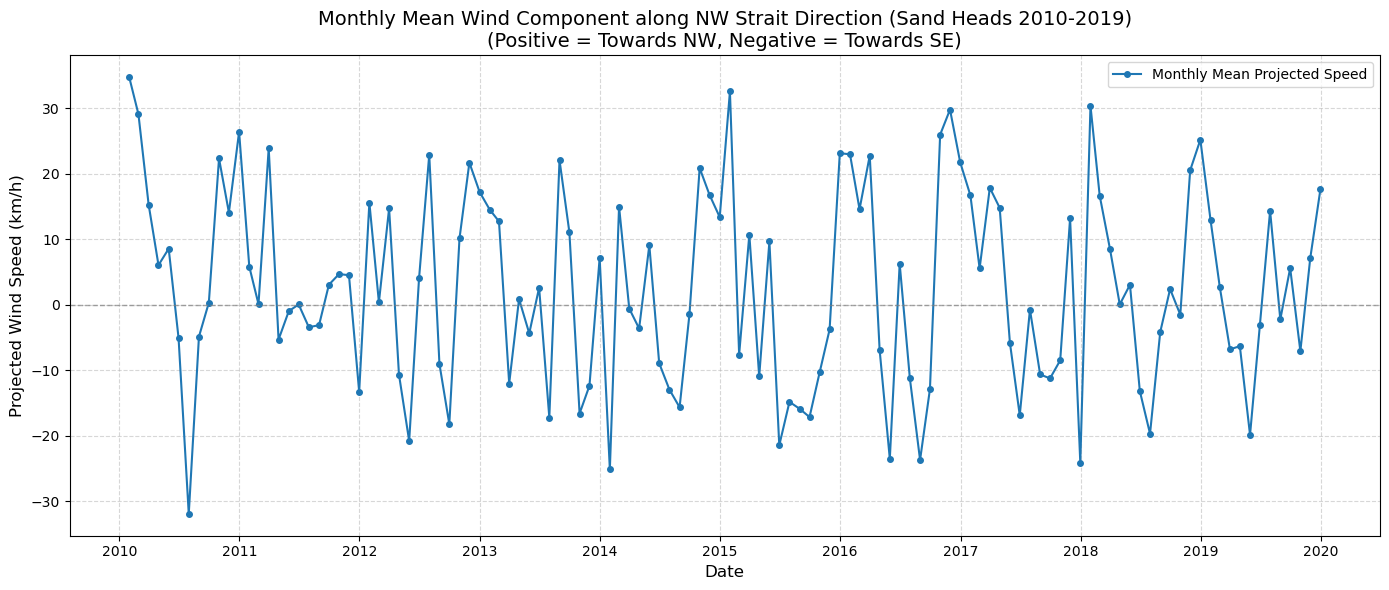

In [ ]:
# 2010-2019 Monthly Wind Speed along NW45

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# ================= 配置区域 =================
# 数据所在的文件夹路径
data_dir = '/home/jqiu/Programing/Projects/analysis-junqi/Diatom_vs_Flagellate_Report/Data_SandHead'
# 文件名模板 (其中 {year} 会被替换)
file_pattern = 'en_climate_daily_BC_1107010_{year}_P1D.csv'

# 列名定义 (根据你提供的CSV头信息)
col_date = 'Date/Time'
col_dir = 'Dir of Max Gust (10s deg)'  # 最大阵风方向 (10s deg)
col_spd = 'Spd of Max Gust (km/h)'     # 最大阵风风速 (km/h)

# 目标投影方向：西北方向 (NW)
# 方位角 315度 (从正北顺时针)
# 对应的"风来源"方向是东南 (SE, 135度)
# 即：如果风来自135度，则它正对着315度吹，分量最大
AXIS_FROM_DEG = 135 
# ===========================================

def load_and_process_data():
    all_data = []
    
    # 循环年份 2010 到 2019
    for year in range(2010, 2020):
        file_name = file_pattern.format(year=year)
        file_path = os.path.join(data_dir, file_name)
        
        if not os.path.exists(file_path):
            print(f"警告: 文件未找到: {file_path}")
            continue
            
        try:
            # 读取CSV
            df = pd.read_csv(file_path)
            
            # 检查必要列是否存在
            if col_dir not in df.columns or col_spd not in df.columns:
                print(f"警告: 文件 {file_name} 缺少必要的风速/风向列，跳过。")
                continue
            
            # 提取需要的列
            df_subset = df[[col_date, col_dir, col_spd]].copy()
            
            # 数据清洗：将非数值字符(如 "M", 空白)转换为 NaN
            df_subset[col_dir] = pd.to_numeric(df_subset[col_dir], errors='coerce')
            df_subset[col_spd] = pd.to_numeric(df_subset[col_spd], errors='coerce')
            
            # 转换时间列
            df_subset[col_date] = pd.to_datetime(df_subset[col_date])
            
            # 删除含有空值的行
            df_subset.dropna(subset=[col_dir, col_spd], inplace=True)
            
            all_data.append(df_subset)
            print(f"已加载: {file_name} ({len(df_subset)} 条有效记录)")
            
        except Exception as e:
            print(f"错误: 读取 {file_name} 失败: {e}")

    if not all_data:
        print("未加载到任何数据，程序终止。")
        return None

    # 合并所有年份的数据
    full_df = pd.concat(all_data, ignore_index=True)
    full_df.sort_values(by=col_date, inplace=True)
    
    return full_df

def calculate_projection(df):
    # 将"10s deg"转换为实际度数 (1 -> 10度, 36 -> 360度)
    wind_dir_deg = df[col_dir] * 10
    
    # 计算投影分量
    # 公式逻辑：投影速度 = 风速 * cos( (风向 - 轴向来源) 的弧度 )
    # 如果风向(From) == 轴向来源(From)，夹角为0，cos=1，表示顺着轴向吹(正值)
    # 如果风向(From) == 轴向去向(To)，夹角为180，cos=-1，表示逆着轴向吹(负值)
    radians = np.deg2rad(wind_dir_deg - AXIS_FROM_DEG)
    
    # 计算分量
    df['Wind_Proj_NW'] = df[col_spd] * np.cos(radians)
    
    return df

def main():
    # 1. 加载数据
    df = load_and_process_data()
    if df is None:
        return

    # 2. 计算投影
    df = calculate_projection(df)

    # 3. 按月计算平均值
    # 设置日期为索引以便重采样
    df.set_index(col_date, inplace=True)
    
    # 'M' 代表按月末重采样，计算平均值
    monthly_avg = df['Wind_Proj_NW'].resample('M').mean()
    
    # 4. 画图
    plt.figure(figsize=(14, 6))
    
    # 绘制折线图
    plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', markersize=4, label='Monthly Mean Projected Speed')
    
    # 添加零线 (正值代表吹向NW，负值代表吹向SE)
    plt.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    
    plt.title('Monthly Mean Wind Component along NW Strait Direction (Sand Heads 2010-2019)\n(Positive = Towards NW, Negative = Towards SE)', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Projected Wind Speed (km/h)', fontsize=12)
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.legend()
    
    plt.tight_layout()
    
    
    
    # 显示图片
    plt.show()

if __name__ == "__main__":
    main()

Note that here, we consider that the wind speed would be positive if it blow towards North West 45. In order to explore the relationship between wind speed along SoG and NPGO indexes, the following script will plot the monthly data together.

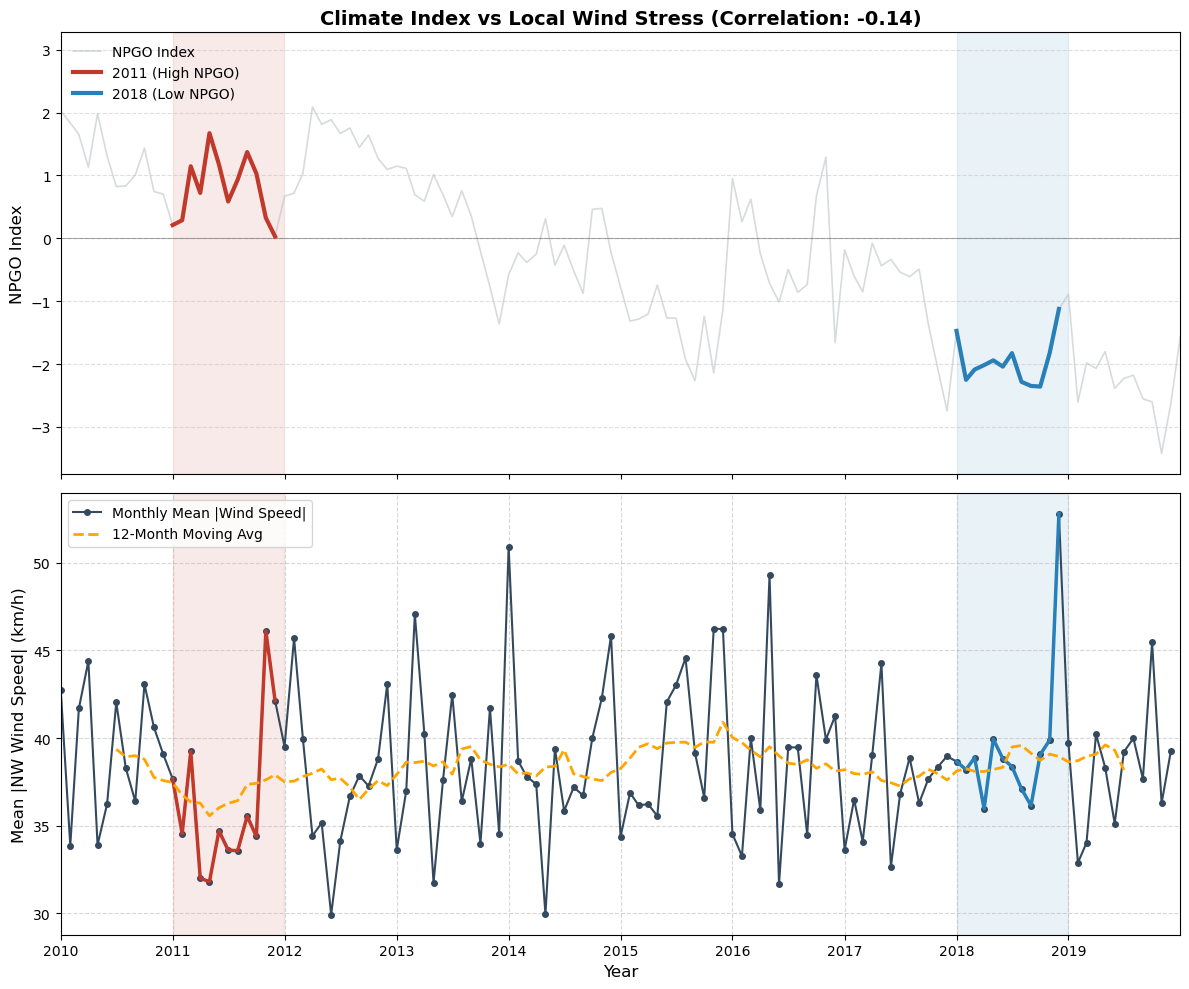

图表已生成。计算得出的 NPGO 与 本地风速强度的相关系数为: -0.1398


In [20]:
# NPGO vs Wind Speed along NW45 Direction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# ================= 配置路径 =================
# 注意：根据你两次提供的路径，文件夹可能有拼写差异 (Diatom vs Diaton)，请确认实际路径
DIR_WIND = '/home/jqiu/Programing/Projects/analysis-junqi/Diatom_vs_Flagellate_Report/Data_SandHead'
FILE_NPGO = '/home/jqiu/Programing/Projects/analysis-junqi/Diatom_vs_Flagellate_Report/Data_NPGO/npgo.csv'
# ===========================================

def get_wind_data():
    """读取并计算风速数据的函数"""
    all_data = []
    col_date = 'Date/Time'
    col_dir = 'Dir of Max Gust (10s deg)'
    col_spd = 'Spd of Max Gust (km/h)'
    axis_from_deg = 135 # 东南风来自135度，顺海峡吹向西北

    # 循环读取 2010-2019
    for year in range(2010, 2020):
        file_name = f'en_climate_daily_BC_1107010_{year}_P1D.csv'
        file_path = os.path.join(DIR_WIND, file_name)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                df = df[[col_date, col_dir, col_spd]].copy()
                df[col_dir] = pd.to_numeric(df[col_dir], errors='coerce')
                df[col_spd] = pd.to_numeric(df[col_spd], errors='coerce')
                df[col_date] = pd.to_datetime(df[col_date])
                df.dropna(subset=[col_dir, col_spd], inplace=True)
                all_data.append(df)
            except Exception:
                pass

    if not all_data:
        return None

    full_df = pd.concat(all_data, ignore_index=True)
    full_df.sort_values(by=col_date, inplace=True)
    
    # 1. 计算投影
    wind_dir_deg = full_df[col_dir] * 10
    radians = np.deg2rad(wind_dir_deg - axis_from_deg)
    full_df['Proj_Speed'] = full_df[col_spd] * np.cos(radians)
    
    # 2. 取绝对值 (关注风的大小/强度，而非方向)
    full_df['Abs_Proj_Speed'] = full_df['Proj_Speed'].abs()
    
    # 3. 按月重采样求平均
    full_df.set_index(col_date, inplace=True)
    monthly_wind = full_df['Abs_Proj_Speed'].resample('MS').mean() # MS = Month Start，方便对齐
    
    return monthly_wind

def get_npgo_data():
    """读取并清洗NPGO数据的函数"""
    try:
        df = pd.read_csv(FILE_NPGO, skiprows=1, names=['Date', 'NPGO'], skipinitialspace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df['NPGO'] = pd.to_numeric(df['NPGO'], errors='coerce')
        df.loc[df['NPGO'] == -9999, 'NPGO'] = None
        df = df.dropna()
        # 统一设置为月初，方便合并
        df['Date'] = df['Date'] + pd.offsets.MonthBegin(0) 
        df.set_index('Date', inplace=True)
        return df
    except Exception as e:
        print(f"读取NPGO失败: {e}")
        return None

def main():
    # 1. 获取数据
    wind_series = get_wind_data()
    npgo_df = get_npgo_data()

    if wind_series is None or npgo_df is None:
        print("数据加载失败，请检查路径。")
        return

    # 2. 数据合并（取交集，以便绘图和计算相关性）
    # wind_series 是 Series, npgo_df 是 DataFrame
    combined = pd.merge(npgo_df, wind_series, left_index=True, right_index=True, how='inner')
    
    # 计算相关系数
    corr = combined['NPGO'].corr(combined['Abs_Proj_Speed'])

    # 3. 开始绘图
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # --- 子图 1: NPGO (移植你的代码风格) ---
    ax1.plot(npgo_df.index, npgo_df['NPGO'], color='#bdc3c7', linewidth=1.2, label='NPGO Index', alpha=0.6)
    ax1.axhline(0, color='black', linestyle='-', linewidth=0.8, alpha=0.3)

    special_years = {
        2011: {"label": "High NPGO", "color": "#c0392b"}, 
        2018: {"label": "Low NPGO", "color": "#2980b9"}
    }

    for year, info in special_years.items():
        # 限制在 npgo_df 的范围内
        mask = npgo_df.index.year == year
        year_data = npgo_df[mask]
        
        if not year_data.empty:
            ax1.plot(year_data.index, year_data['NPGO'], color=info['color'], linewidth=3, label=f"{year} ({info['label']})")
            ax1.axvspan(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'), color=info['color'], alpha=0.1)

    ax1.set_ylabel('NPGO Index', fontsize=12)
    ax1.set_title(f'Climate Index vs Local Wind Stress (Correlation: {corr:.2f})', fontsize=14, fontweight='bold')
    ax1.legend(loc='upper left', frameon=False)
    ax1.grid(True, axis='y', linestyle='--', alpha=0.4)

    # --- 子图 2: 风速绝对值月平均 ---
    # 绘制全时段
    ax2.plot(wind_series.index, wind_series.values, color='#34495e', marker='o', markersize=4, linewidth=1.5, label='Monthly Mean |Wind Speed|')
    
    # 同样高亮特殊年份，方便上下对比
    for year, info in special_years.items():
        mask = wind_series.index.year == year
        year_data = wind_series[mask]
        if not year_data.empty:
             # 使用半透明的颜色填充，对应上面的年份
            ax2.axvspan(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'), color=info['color'], alpha=0.1)
            # 加深该年份的线条
            ax2.plot(year_data.index, year_data.values, color=info['color'], linewidth=2.5)

    ax2.set_ylabel('Mean |NW Wind Speed| (km/h)', fontsize=12)
    ax2.set_xlabel('Year', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.5)
    
    # 添加平滑趋势线（可选，帮助看趋势）
    rolling_mean = wind_series.rolling(window=12, center=True).mean()
    ax2.plot(rolling_mean.index, rolling_mean.values, color='orange', linestyle='--', linewidth=2, label='12-Month Moving Avg')
    
    ax2.legend(loc='upper left')

    # --- 统一调整 ---
    # 设置X轴范围为风速数据的范围 (2010-2019)
    ax1.set_xlim(pd.Timestamp('2010-01-01'), pd.Timestamp('2019-12-31'))
    
    # 优化时间轴显示
    ax2.xaxis.set_major_locator(mdates.YearLocator(1))
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    plt.tight_layout()
    plt.savefig('NPGO_vs_Wind_Comparison.svg', dpi=300)
    plt.show()
    print(f"图表已生成。计算得出的 NPGO 与 本地风速强度的相关系数为: {corr:.4f}")

if __name__ == "__main__":
    main()

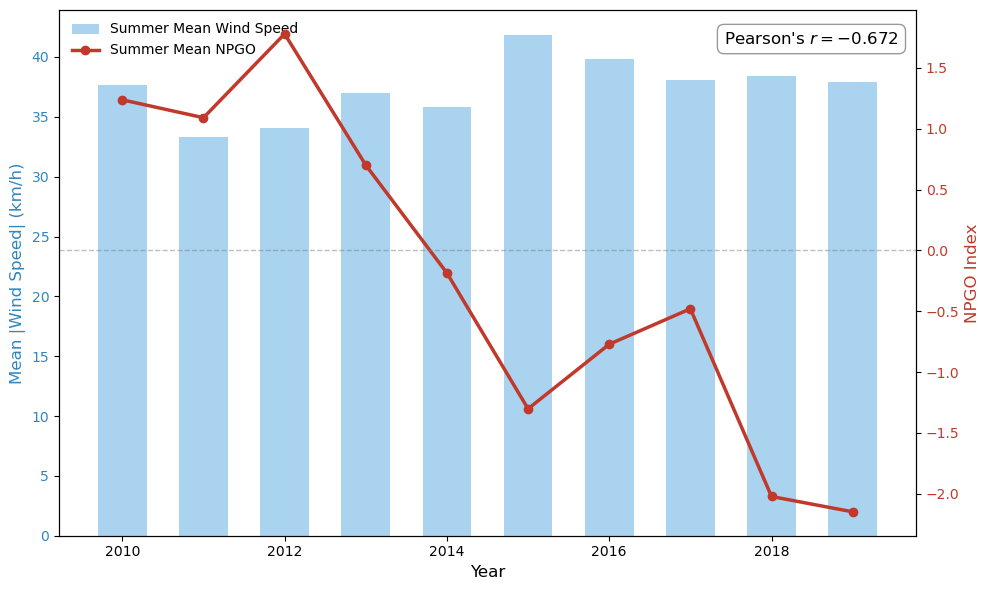

In [25]:
# Summer NPGO and Wind Speed vs time series plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ================= 配置区域 =================
DIR_WIND = '/home/jqiu/Programing/Projects/analysis-junqi/Diatom_vs_Flagellate_Report/Data_SandHead'
FILE_NPGO = '/home/jqiu/Programing/Projects/analysis-junqi/Diatom_vs_Flagellate_Report/Data_NPGO/npgo.csv'
SUMMER_MONTHS = [5, 6, 7, 8]
# ===========================================

def get_summer_wind_annual():
    """读取风速，筛选夏季，计算每年的夏季平均值"""
    all_data = []
    # 你的CSV列名
    col_date = 'Date/Time'
    col_dir = 'Dir of Max Gust (10s deg)'
    col_spd = 'Spd of Max Gust (km/h)'
    axis_from_deg = 135 

    for year in range(2010, 2020):
        file_name = f'en_climate_daily_BC_1107010_{year}_P1D.csv'
        file_path = os.path.join(DIR_WIND, file_name)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                df = df[[col_date, col_dir, col_spd]].copy()
                df[col_date] = pd.to_datetime(df[col_date])
                
                # 筛选夏季
                df = df[df[col_date].dt.month.isin(SUMMER_MONTHS)].copy()
                
                df[col_dir] = pd.to_numeric(df[col_dir], errors='coerce')
                df[col_spd] = pd.to_numeric(df[col_spd], errors='coerce')
                df.dropna(subset=[col_dir, col_spd], inplace=True)
                
                if not df.empty:
                    wind_dir_deg = df[col_dir] * 10
                    radians = np.deg2rad(wind_dir_deg - axis_from_deg)
                    df['Abs_Proj_Speed'] = (df[col_spd] * np.cos(radians)).abs()
                    summer_mean = df['Abs_Proj_Speed'].mean()
                    all_data.append({'Year': year, 'Wind_Summer_Mean': summer_mean})
            except Exception:
                pass
    if not all_data: return None
    return pd.DataFrame(all_data).set_index('Year')

def get_summer_npgo_annual():
    """读取NPGO，筛选夏季，计算每年的夏季平均值"""
    try:
        df = pd.read_csv(FILE_NPGO, skiprows=1, names=['Date', 'NPGO'], skipinitialspace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df['NPGO'] = pd.to_numeric(df['NPGO'], errors='coerce')
        df.loc[df['NPGO'] == -9999, 'NPGO'] = None
        df.dropna(inplace=True)
        
        df = df[df['Date'].dt.month.isin(SUMMER_MONTHS)].copy()
        df['Year'] = df['Date'].dt.year
        return df.groupby('Year')['NPGO'].mean()
    except Exception:
        return None

def main():
    wind_df = get_summer_wind_annual()
    npgo_series = get_summer_npgo_annual()

    if wind_df is None or npgo_series is None:
        print("数据缺失")
        return

    merged = wind_df.join(npgo_series, how='inner')
    
    # 计算相关系数
    corr = merged['Wind_Summer_Mean'].corr(merged['NPGO'])

    # === 绘图 ===
    fig, ax1 = plt.subplots(figsize=(10, 6)) # 稍微调整尺寸以适合插入文档

    years = merged.index
    
    # 1. 柱状图 (风速)
    bars = ax1.bar(years, merged['Wind_Summer_Mean'], color='#85C1E9', alpha=0.7, label='Summer Mean Wind Speed', width=0.6, zorder=1)
    
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Mean |Wind Speed| (km/h)', fontsize=12, color='#2E86C1')
    ax1.tick_params(axis='y', labelcolor='#2E86C1')
    ax1.set_ylim(bottom=0)
    
    # 2. 折线图 (NPGO)
    ax2 = ax1.twinx()
    line = ax2.plot(years, merged['NPGO'], color='#C0392B', marker='o', linewidth=2.5, linestyle='-', label='Summer Mean NPGO', zorder=2)
    
    ax2.set_ylabel('NPGO Index', fontsize=12, color='#C0392B')
    ax2.tick_params(axis='y', labelcolor='#C0392B')
    ax2.axhline(0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

    # 3. 图例 (放在左上角)
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', frameon=False)

    # 4. === 这里是修改的地方 ===
    # 标题去掉统计信息，只保留物理描述
    # plt.title('Inter-annual Variability: Summer Winds vs NPGO', fontsize=14, fontweight='bold')
    
    # 使用 ax1.text 在图内添加统计框
    # transform=ax1.transAxes 意味着坐标是相对位置 (0=最左/底, 1=最右/顶)
    # (0.98, 0.95) 意味着放在右上角
    stats_text = f"Pearson's $r = {corr:.3f}$"
    ax1.text(0.98, 0.96, stats_text,
             transform=ax1.transAxes,
             horizontalalignment='right',
             verticalalignment='top',
             fontsize=12,
             fontweight='medium',
             bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", alpha=0.8))

    plt.tight_layout()
    plt.savefig('Summer_Wind_vs_NPGO_Clean.svg', dpi=300)
    plt.show()

if __name__ == "__main__":
    main()

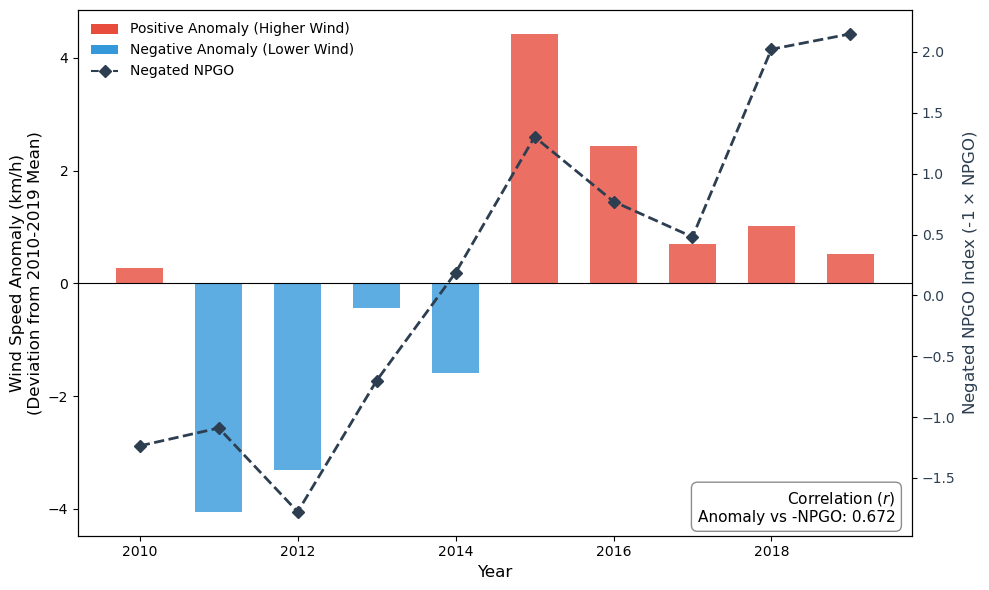

In [28]:
# Negative NPGO vs Wind Speed Anomaly along NW45 Direction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ================= 配置区域 =================
DIR_WIND = '/home/jqiu/Programing/Projects/analysis-junqi/Diatom_vs_Flagellate_Report/Data_SandHead'
FILE_NPGO = '/home/jqiu/Programing/Projects/analysis-junqi/Diatom_vs_Flagellate_Report/Data_NPGO/npgo.csv'
SUMMER_MONTHS = [5, 6, 7, 8]
# ===========================================

def get_summer_wind_stats():
    """计算每年夏季风速均值，并返回距平数据"""
    all_data = []
    col_date = 'Date/Time'
    col_dir = 'Dir of Max Gust (10s deg)'
    col_spd = 'Spd of Max Gust (km/h)'
    axis_from_deg = 135 

    for year in range(2010, 2020):
        file_name = f'en_climate_daily_BC_1107010_{year}_P1D.csv'
        file_path = os.path.join(DIR_WIND, file_name)
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                df = df[[col_date, col_dir, col_spd]].copy()
                df[col_date] = pd.to_datetime(df[col_date])
                
                # 筛选夏季
                df = df[df[col_date].dt.month.isin(SUMMER_MONTHS)].copy()
                
                df[col_dir] = pd.to_numeric(df[col_dir], errors='coerce')
                df[col_spd] = pd.to_numeric(df[col_spd], errors='coerce')
                df.dropna(subset=[col_dir, col_spd], inplace=True)
                
                if not df.empty:
                    wind_dir_deg = df[col_dir] * 10
                    radians = np.deg2rad(wind_dir_deg - axis_from_deg)
                    df['Abs_Proj_Speed'] = (df[col_spd] * np.cos(radians)).abs()
                    summer_mean = df['Abs_Proj_Speed'].mean()
                    all_data.append({'Year': year, 'Wind_Summer_Mean': summer_mean})
            except Exception:
                pass
    
    if not all_data: return None
    
    df_res = pd.DataFrame(all_data).set_index('Year')
    
    # === 关键步骤：计算距平 (Anomaly) ===
    # 计算这10年的总平均
    climatology = df_res['Wind_Summer_Mean'].mean()
    # 计算每一年相对于总平均的偏差
    df_res['Wind_Anomaly'] = df_res['Wind_Summer_Mean'] - climatology
    
    return df_res

def get_summer_npgo_negated():
    """读取NPGO，筛选夏季，计算均值并取反"""
    try:
        df = pd.read_csv(FILE_NPGO, skiprows=1, names=['Date', 'NPGO'], skipinitialspace=True)
        df['Date'] = pd.to_datetime(df['Date'])
        df['NPGO'] = pd.to_numeric(df['NPGO'], errors='coerce')
        df.loc[df['NPGO'] == -9999, 'NPGO'] = None
        df.dropna(inplace=True)
        
        df = df[df['Date'].dt.month.isin(SUMMER_MONTHS)].copy()
        df['Year'] = df['Date'].dt.year
        
        annual_npgo = df.groupby('Year')['NPGO'].mean()
        
        # === 关键步骤：取反 ===
        return annual_npgo * -1
        
    except Exception:
        return None

def main():
    wind_df = get_summer_wind_stats()
    npgo_series = get_summer_npgo_negated()

    if wind_df is None or npgo_series is None:
        print("数据缺失")
        return

    # 合并
    merged = wind_df.join(npgo_series, how='inner')
    merged.rename(columns={'NPGO': 'Neg_NPGO'}, inplace=True)
    
    # 计算相关系数 (注意：这是风速距平 和 负NPGO 的相关性)
    # 如果算出来是正数，说明：风速距平 和 负NPGO 是正相关 -> 风速 和 原始NPGO 是负相关
    corr = merged['Wind_Anomaly'].corr(merged['Neg_NPGO'])

    # === 绘图 ===
    fig, ax1 = plt.subplots(figsize=(10, 6))

    years = merged.index
    
    # 1. 绘制风速距平 (Bar Chart)
    # 设置颜色：正距平(红)，负距平(蓝)
    colors = ['#E74C3C' if x >= 0 else '#3498DB' for x in merged['Wind_Anomaly']]
    
    # 画柱子
    bars = ax1.bar(years, merged['Wind_Anomaly'], color=colors, alpha=0.8, width=0.6, zorder=1, label='Wind Speed Anomaly')
    
    ax1.set_xlabel('Year', fontsize=12)
    ax1.set_ylabel('Wind Speed Anomaly (km/h)\n(Deviation from 2010-2019 Mean)', fontsize=12)
    ax1.axhline(0, color='black', linewidth=0.8) # 0轴
    
    # 2. 绘制取反后的 NPGO (Line Chart)
    ax2 = ax1.twinx()
    # 使用深灰色或紫色，区别于红蓝
    line = ax2.plot(years, merged['Neg_NPGO'], color='#2C3E50', marker='D', markersize=6, linewidth=2, linestyle='--', label='Negated NPGO Index (-1)', zorder=2)
    
    ax2.set_ylabel('Negated NPGO Index (-1 $\\times$ NPGO)', fontsize=12, color='#2C3E50')
    ax2.tick_params(axis='y', labelcolor='#2C3E50')
    
    # 3. 构造图例 (因为风速柱子颜色不同，手动创建一个代表性的图例对象)
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#E74C3C', label='Positive Anomaly (Higher Wind)'),
        Patch(facecolor='#3498DB', label='Negative Anomaly (Lower Wind)'),
        plt.Line2D([0], [0], color='#2C3E50', linestyle='--', marker='D', label='Negated NPGO')
    ]
    ax1.legend(handles=legend_elements, loc='upper left', frameon=False)

    # 4. 标题与统计
    # plt.title('Summer Wind Anomalies vs Negated NPGO', fontsize=14, fontweight='bold')
    
    # 统计框 (右下角)
    stats_text = f"Correlation ($r$)\nAnomaly vs -NPGO: {corr:.3f}"
    ax1.text(0.98, 0.02, stats_text,
             transform=ax1.transAxes,
             horizontalalignment='right',
             verticalalignment='bottom',
             fontsize=11,
             bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", alpha=0.9))

    plt.tight_layout()
    plt.savefig('Wind_Anomaly_vs_NegNPGO.svg', dpi=300)
    plt.show()

if __name__ == "__main__":
    main()